# Ejercicio 1

En este problema se quiere saber si un articulo sera popular o impopular basado en diversas variables. La popularidad de un articulo sera medido con la variable `shares`. Un articulo compartido mas de 1400 veces es considerado popular, mientras que si es compartido 1400 veces o menos es considerado impopular.

In [41]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import helpers as afx

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(afx)

df = pd.read_csv('input/OnlineNewsPopularity/OnlineNewsPopularity.csv')

## Descripcion de variables

In [28]:
import re

df.columns = [i.replace(' ', '') for i in df.columns]
df = df.loc[:, 'n_tokens_title':'shares']

qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

conjunto_variables = {"qnty": qnty, 
                      "channel": channel, 
                      "days": days, 
                      "sentiments": sentiments, 
                      "lda": lda, 
                      "keywords": keywords}


In [29]:
# afx.grid_plot_batch(qnty, 2, sns.histplot)

In [30]:
for tipo_variable, var in conjunto_variables.items():
    print(f'Analizando a la variable {tipo_variable}')
    display(afx.identify_high_correlations(var, 0.8))

Analizando a la variable qnty


,variable,var2,value
17,n_non_stop_words,n_unique_tokens,0.999572
22,n_non_stop_unique_tokens,n_unique_tokens,0.999852
23,n_non_stop_unique_tokens,n_non_stop_words,0.999532


Analizando a la variable channel


,variable,var2,value


Analizando a la variable days


,variable,var2,value


Analizando a la variable sentiments


,variable,var2,value


Analizando a la variable lda


,variable,var2,value


Analizando a la variable keywords


,variable,var2,value
19,kw_avg_min,kw_max_min,0.940529
36,kw_max_max,kw_min_min,-0.857226
79,kw_avg_avg,kw_max_avg,0.811864


- De las variables qnty, las variables `n_non_stop_words`, `n_unique_tokens` y `n_non_stop_unique_tokens` presentan correlaciones mayores a 0.8.

- De las variables keywords, las variables `kw_avg_min`, `kw_max_min`, `kw_max_max`, `kw_min_min`, `kw_avg_avg` y `kw_max_avg` presentan correlaciones absolutas mayores a 0.8.

## Preprocesamiento

Consiste en:

- Convertir la variable objetivo de continua a binaria (`shares`)
- Separar las muestras en train y test
- Escalar las muestras de X_train y X_test
- Hacer un PCA en X_train y X_test con 30 componentes

In [31]:
df['shares_bin'] = np.where(df['shares'] > 1400, 1, 0)
df = df.drop(columns=['shares', 'n_non_stop_words', 'n_unique_tokens',
                      'n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_min',
                      'kw_max_max', 'kw_min_min','kw_avg_avg', 'kw_max_avg'])

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='shares_bin')
y = df['shares_bin']

X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_preproc = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=30, random_state=1))
])

X_train = pipe_preproc.fit_transform(X_train_pre)
X_test = pipe_preproc.transform(X_test_pre)

# Ejercicio 2

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [51]:
estimators = [
     ('regresion_logistica', LogisticRegression(random_state=1)),
     ('kmeans', KMeans(random_state=1, n_clusters=2)),
     ('arbol_depth_1', DecisionTreeClassifier(max_depth=1, random_state=1)),
     ('arbol_depth_4', DecisionTreeClassifier(max_depth=4, random_state=1))
]

# Ejercicio 3

In [52]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6598
           1       0.64      0.60      0.62      6485

    accuracy                           0.63     13083
   macro avg       0.63      0.63      0.63     13083
weighted avg       0.63      0.63      0.63     13083

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      6598
           1       0.56      0.03      0.06      6485

    accuracy                           0.51     13083
   macro avg       0.53      0.50      0.36     13083
weighted avg       0.53      0.51      0.37     13083

              precision    recall  f1-score   support

           0       0.56      0.70      0.63      6598
           1       0.60      0.45      0.51      6485

    accuracy                           0.58     13083
   macro avg       0.58      0.58      0.57     13083
weighted avg       0.58      0.58      0.57     13083

              preci

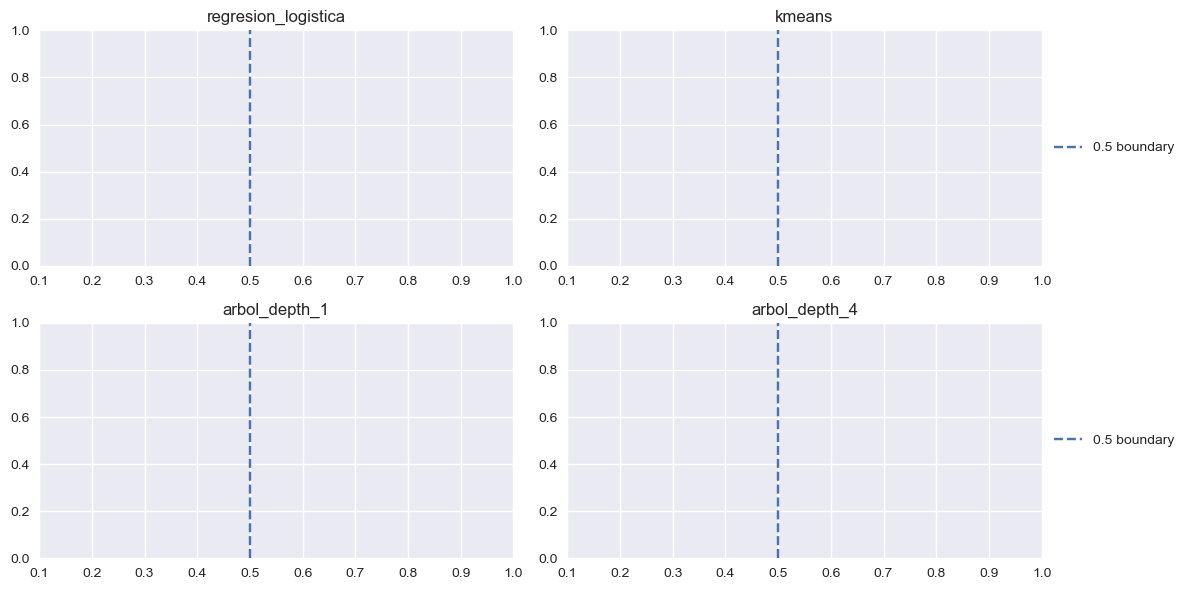

In [53]:
for index, modelo in enumerate(estimators):
    nombre_modelo = modelo[0]
    instancia_modelo = modelo[1]

    plt.subplot(2, 2, index + 1)
    plt.title(nombre_modelo)

    yhat = instancia_modelo.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, yhat))
    # afx.plot_classification_report(y_test, yhat)

    plt.axvline(0.5, label='0.5 boundary', linestyle='--')
    plt.xlim(0.1, 1)

    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()